In [1]:
from sklearn.manifold import MDS, TSNE, Isomap,LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_swiss_roll, load_digits
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import math   

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [2]:
def generate_transformers(transformers,df):
    transformed = {}
    for i,(name, alg) in enumerate(transformers.items()):
        data = alg.fit_transform(df.values)
        data_df = pd.DataFrame(data)
        data_df.columns = ['x', 'y']
        data_df.index = df.index
        transformed[name] = data_df
    return transformed


def plot_data_cars(transformed):
    num_of_plots = len(transformed)
    num_of_rows = math.ceil(num_of_plots/3)
    fig, axs = plt.subplots(num_of_rows, 3, figsize=(25, num_of_rows*7), dpi=100)
    for ax, (k,df) in zip(axs.ravel(), transformed.items()):
        sns.scatterplot(data=df, x='x', y='y', ax=ax)
        ax.set(title=str(k))
        for name, point in df.iterrows():
            ax.text(point['x']+.03, point['y'], name)
    fig.tight_layout()


# CARS

In [3]:
cars_df = pd.read_csv('data/cars.csv', header=None, index_col=0)
cars_df[[1,2,3,4]] = StandardScaler().fit_transform(cars_df[[1,2,3,4]])
cars_df.index = cars_df.index.str.strip("''")

In [4]:
cars_df

1         2         3         4
0                                                         
Alfa Romeo 156      0.592557 -1.805652  0.788640  0.954184
Audi A4             0.355534  0.480726  1.938918  1.330835
BMW 316l           -0.118511  0.832476  1.340169  0.577532
Daewoo Lanos        0.948091  0.744538 -1.087500 -1.305725
Honda Civic        -1.066602 -0.486588 -0.362622  0.200881
Hyunday Accent     -1.422136  0.304850 -1.066790 -1.682377
Lada Samara        -0.474045  1.448039 -1.605271 -1.682377
Mitsubishi Carisma -0.474045  0.568663  0.243169  0.954184
Opel Astra II      -0.711068  0.568663  0.054183  0.577532
Peugeot 206 XR     -1.185114  1.623914 -0.908455 -0.929074
Renault Megane     -0.711068 -1.278026 -0.303079  0.954184
Saab 9 3S           2.488739 -0.310713  1.524754  0.577532
Seat Cordoba        0.829580 -0.398650 -0.565070  0.577532
Toyota Corrola      0.118511 -1.014214 -0.287131 -0.929074
Volkswagen Golf IV  0.829580 -1.278026  0.296085 -0.175771

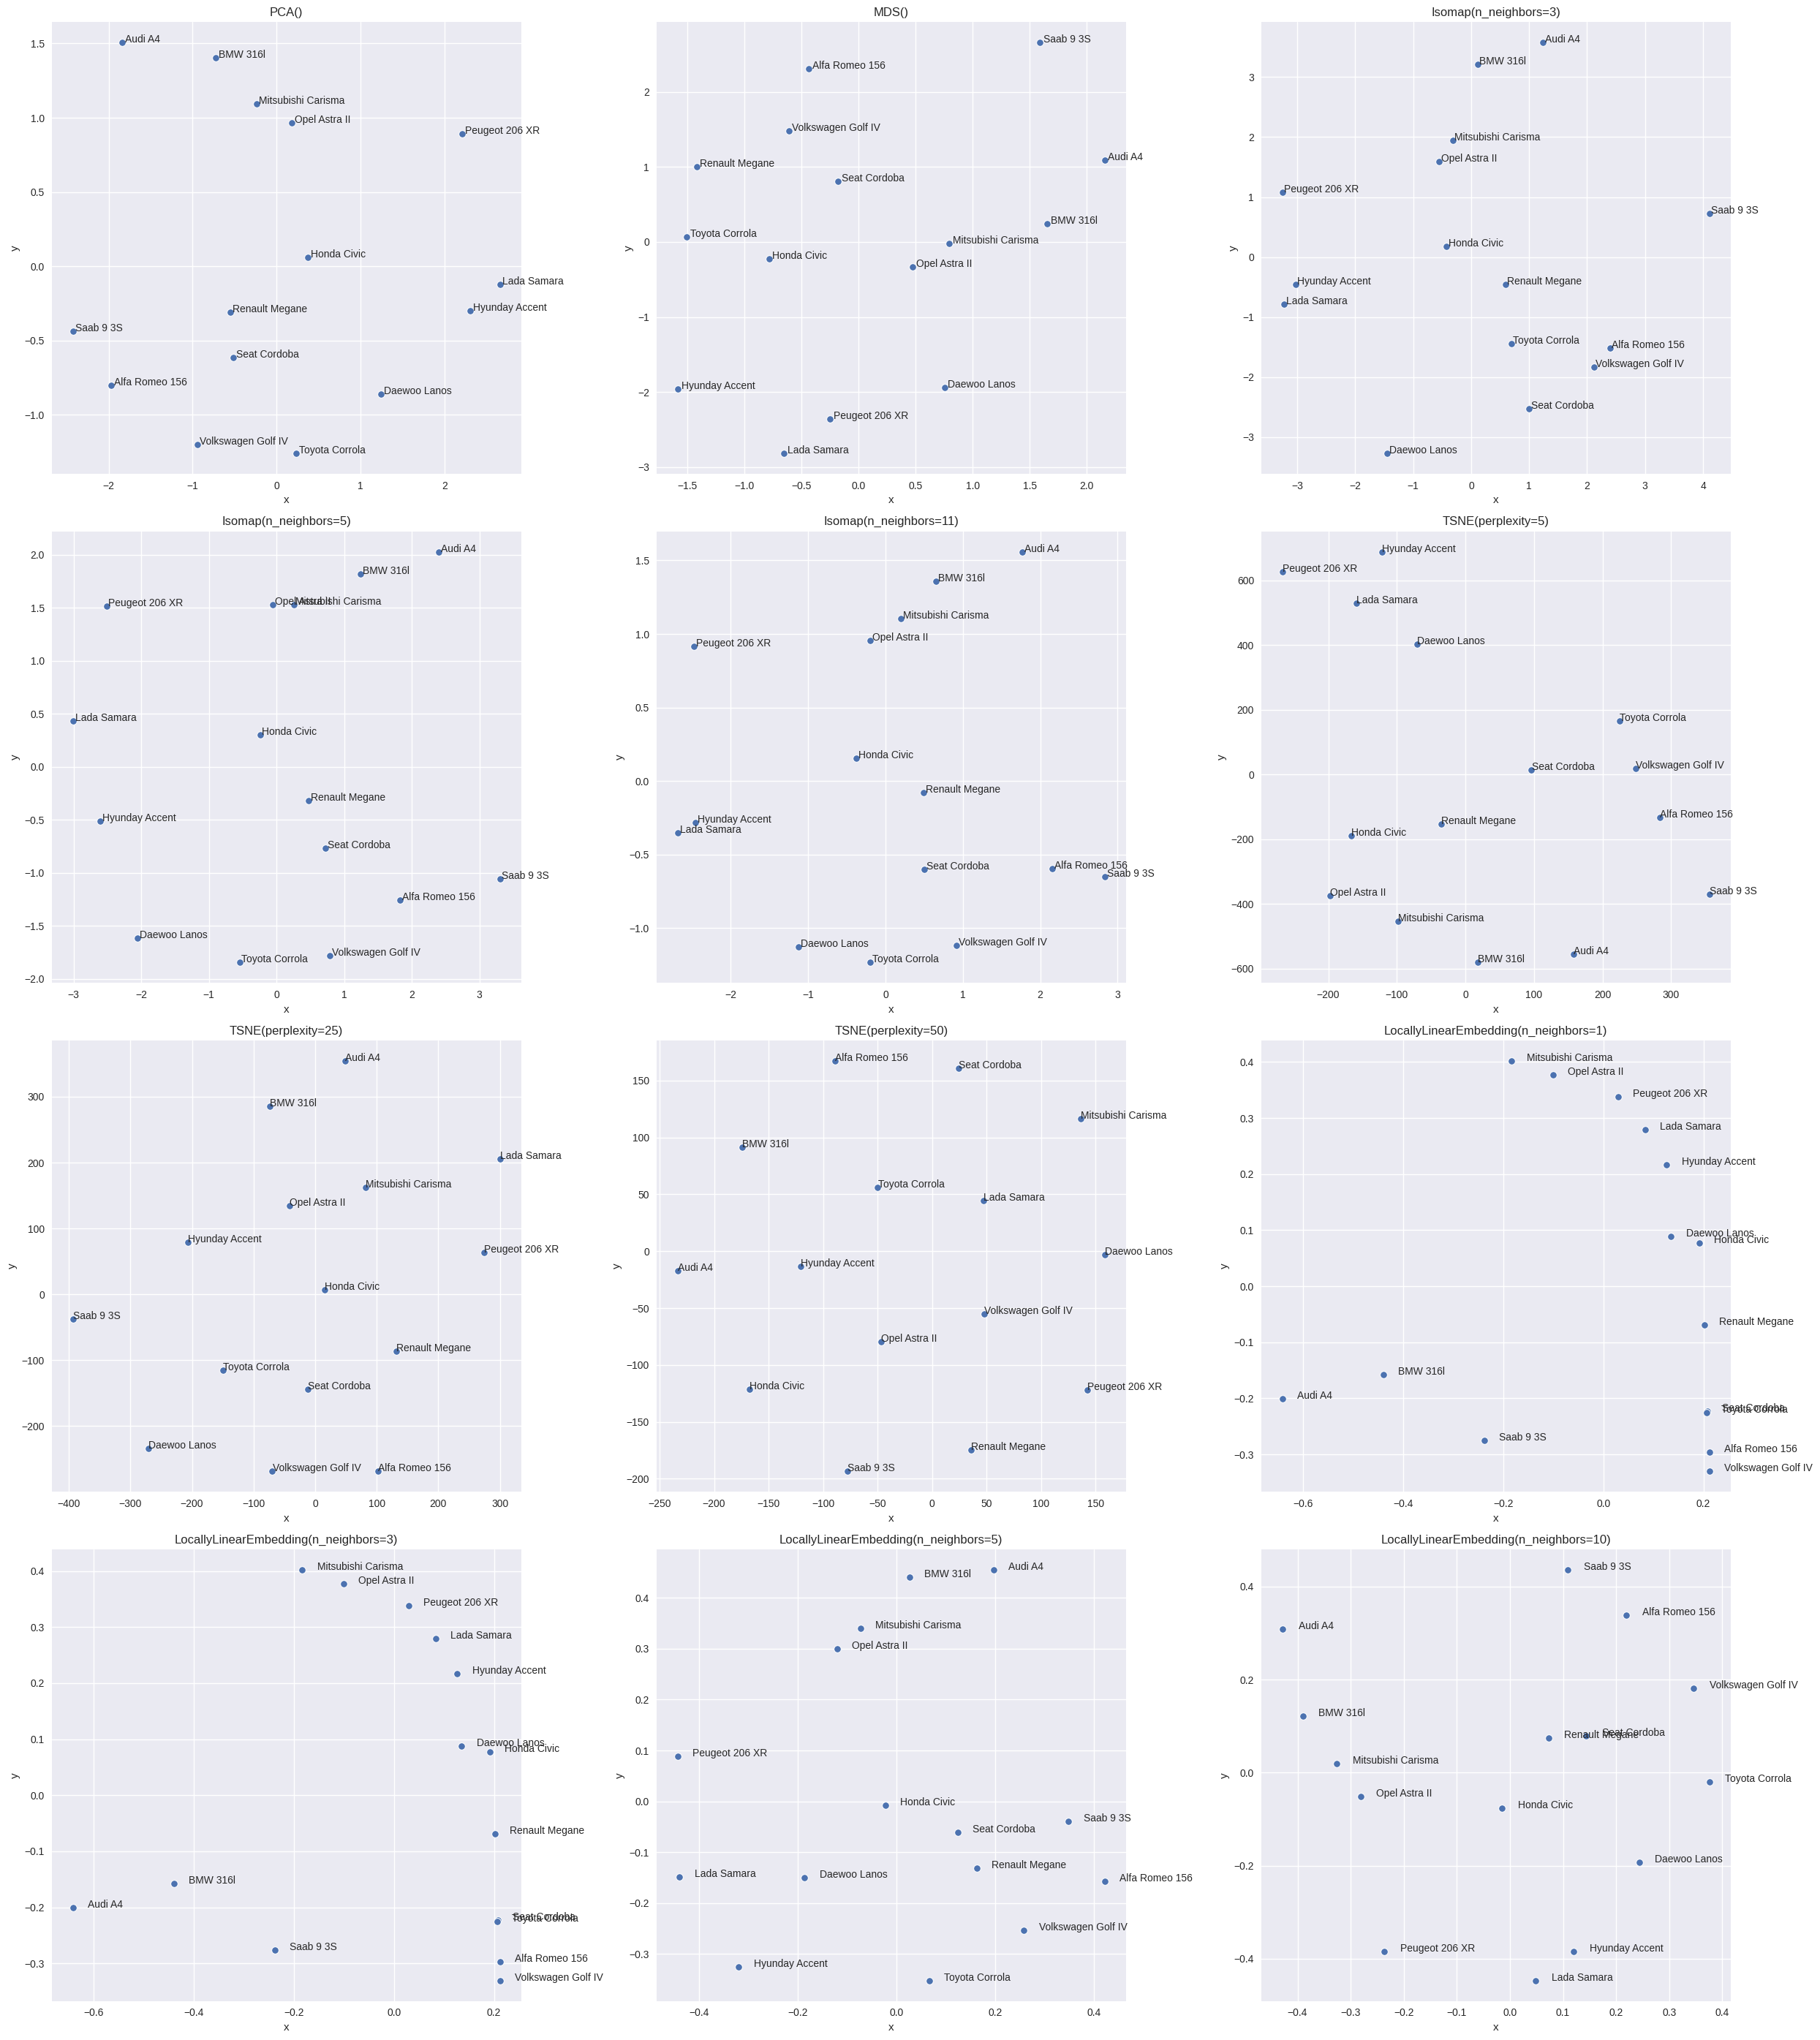

In [5]:
transformers = {"PCA()":PCA(n_components=2),
                "MDS()":MDS(),
                "Isomap(n_neighbors=3)":Isomap(n_neighbors=3),
                "Isomap(n_neighbors=5)":Isomap(n_neighbors=5),
                "Isomap(n_neighbors=11)":Isomap(n_neighbors=11),
                "TSNE(perplexity=5)":TSNE(perplexity=5),
                "TSNE(perplexity=25)":TSNE(perplexity=10),
                "TSNE(perplexity=50)":TSNE(perplexity=25),
                "LocallyLinearEmbedding(n_neighbors=1)":LocallyLinearEmbedding(n_neighbors=3),
                "LocallyLinearEmbedding(n_neighbors=3)":LocallyLinearEmbedding(n_neighbors=3),
                "LocallyLinearEmbedding(n_neighbors=5)":LocallyLinearEmbedding(n_neighbors=5),
                "LocallyLinearEmbedding(n_neighbors=10)":LocallyLinearEmbedding(n_neighbors=10)
               }
transformed=generate_transformers(transformers,cars_df)
plot_data_cars(transformed)

## Wnioski dla zbioru cars

**LocallyLinearEmbedding** dla niskiej wartości parametru **n_neighbors** przedstawia pojazdy wzdłóż pewnej krzywej. Wyjątkiem są 3 pojazdy:
1. Audi A4
2. BMW 316i
3. Saab 9 3S

Przeglądjąc wszystkie wykresy widoczne są pary pojazdów które regularnie pojawiają się w swoim otoczeniu. 
Zależności te widoczne są przy wszystkich metodach. Przykładowe zestawienia to:
1. Audi oraz BMW
2. Mitsubishi oraz Opel
3. VW oraz  Alfa Romeo

Widać równiez że duże parametry **perplexity** dla **TSNE**  bardzo rozrzucają pojazdy. 

Poza pojedyńczymi przykładami parametrów dla poszczególnych metod metody przedstawiły bardzo podobne wyniki w interpretacji pojazdów. Występują pewne wyjątki w rozrzuceniu punktów, jednak odlełgości pomiędzy charakterystycznymi pojazdami są zachowywane.

# swiss_roll

In [6]:
def plot_data_swiss_roll(transformed):
    num_of_plots = len(transformed)
    num_of_rows = math.ceil(num_of_plots/3)
    fig, axs = plt.subplots(num_of_rows, 3, figsize=(25, num_of_rows*7), dpi=100)
    for ax, (k,df) in zip(axs.ravel(), transformed.items()):
        sns.scatterplot(data=df, x='x', y='y', hue=df.index, ax=ax)
        ax.set(title=str(k))
    fig.tight_layout()

In [7]:
swiss_roll, i = make_swiss_roll(1500)
swiss_roll_df = pd.DataFrame(swiss_roll,index=i)
swiss_roll_df.columns = ['x', 'y', 'z']

In [8]:
swiss_roll_df

x          y          z
10.179769 -7.413698   0.272430  -6.976014
11.692473  7.504731   7.033896  -8.966211
13.556794  7.433678  19.698984  11.336979
8.037644  -1.467931  12.763564   7.902462
7.499281   2.604575   4.940695   7.032453
...             ...        ...        ...
5.408785   3.469503   1.000784  -4.149398
13.871563  3.641178   0.810391  13.385144
4.881745   0.822807   0.417402  -4.811904
5.590167   4.300635   6.639275  -3.571346
7.461598   2.853258  17.134643   6.894517

[1500 rows x 3 columns]

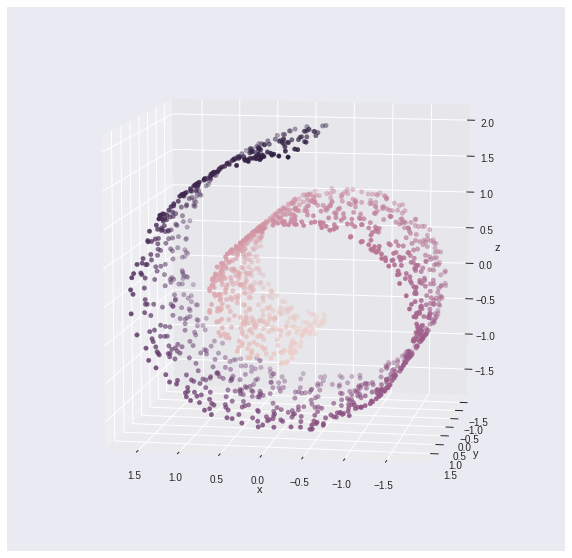

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(swiss_roll_df.x, swiss_roll_df.y, swiss_roll_df.z, c=swiss_roll_df.index, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(10, 100)

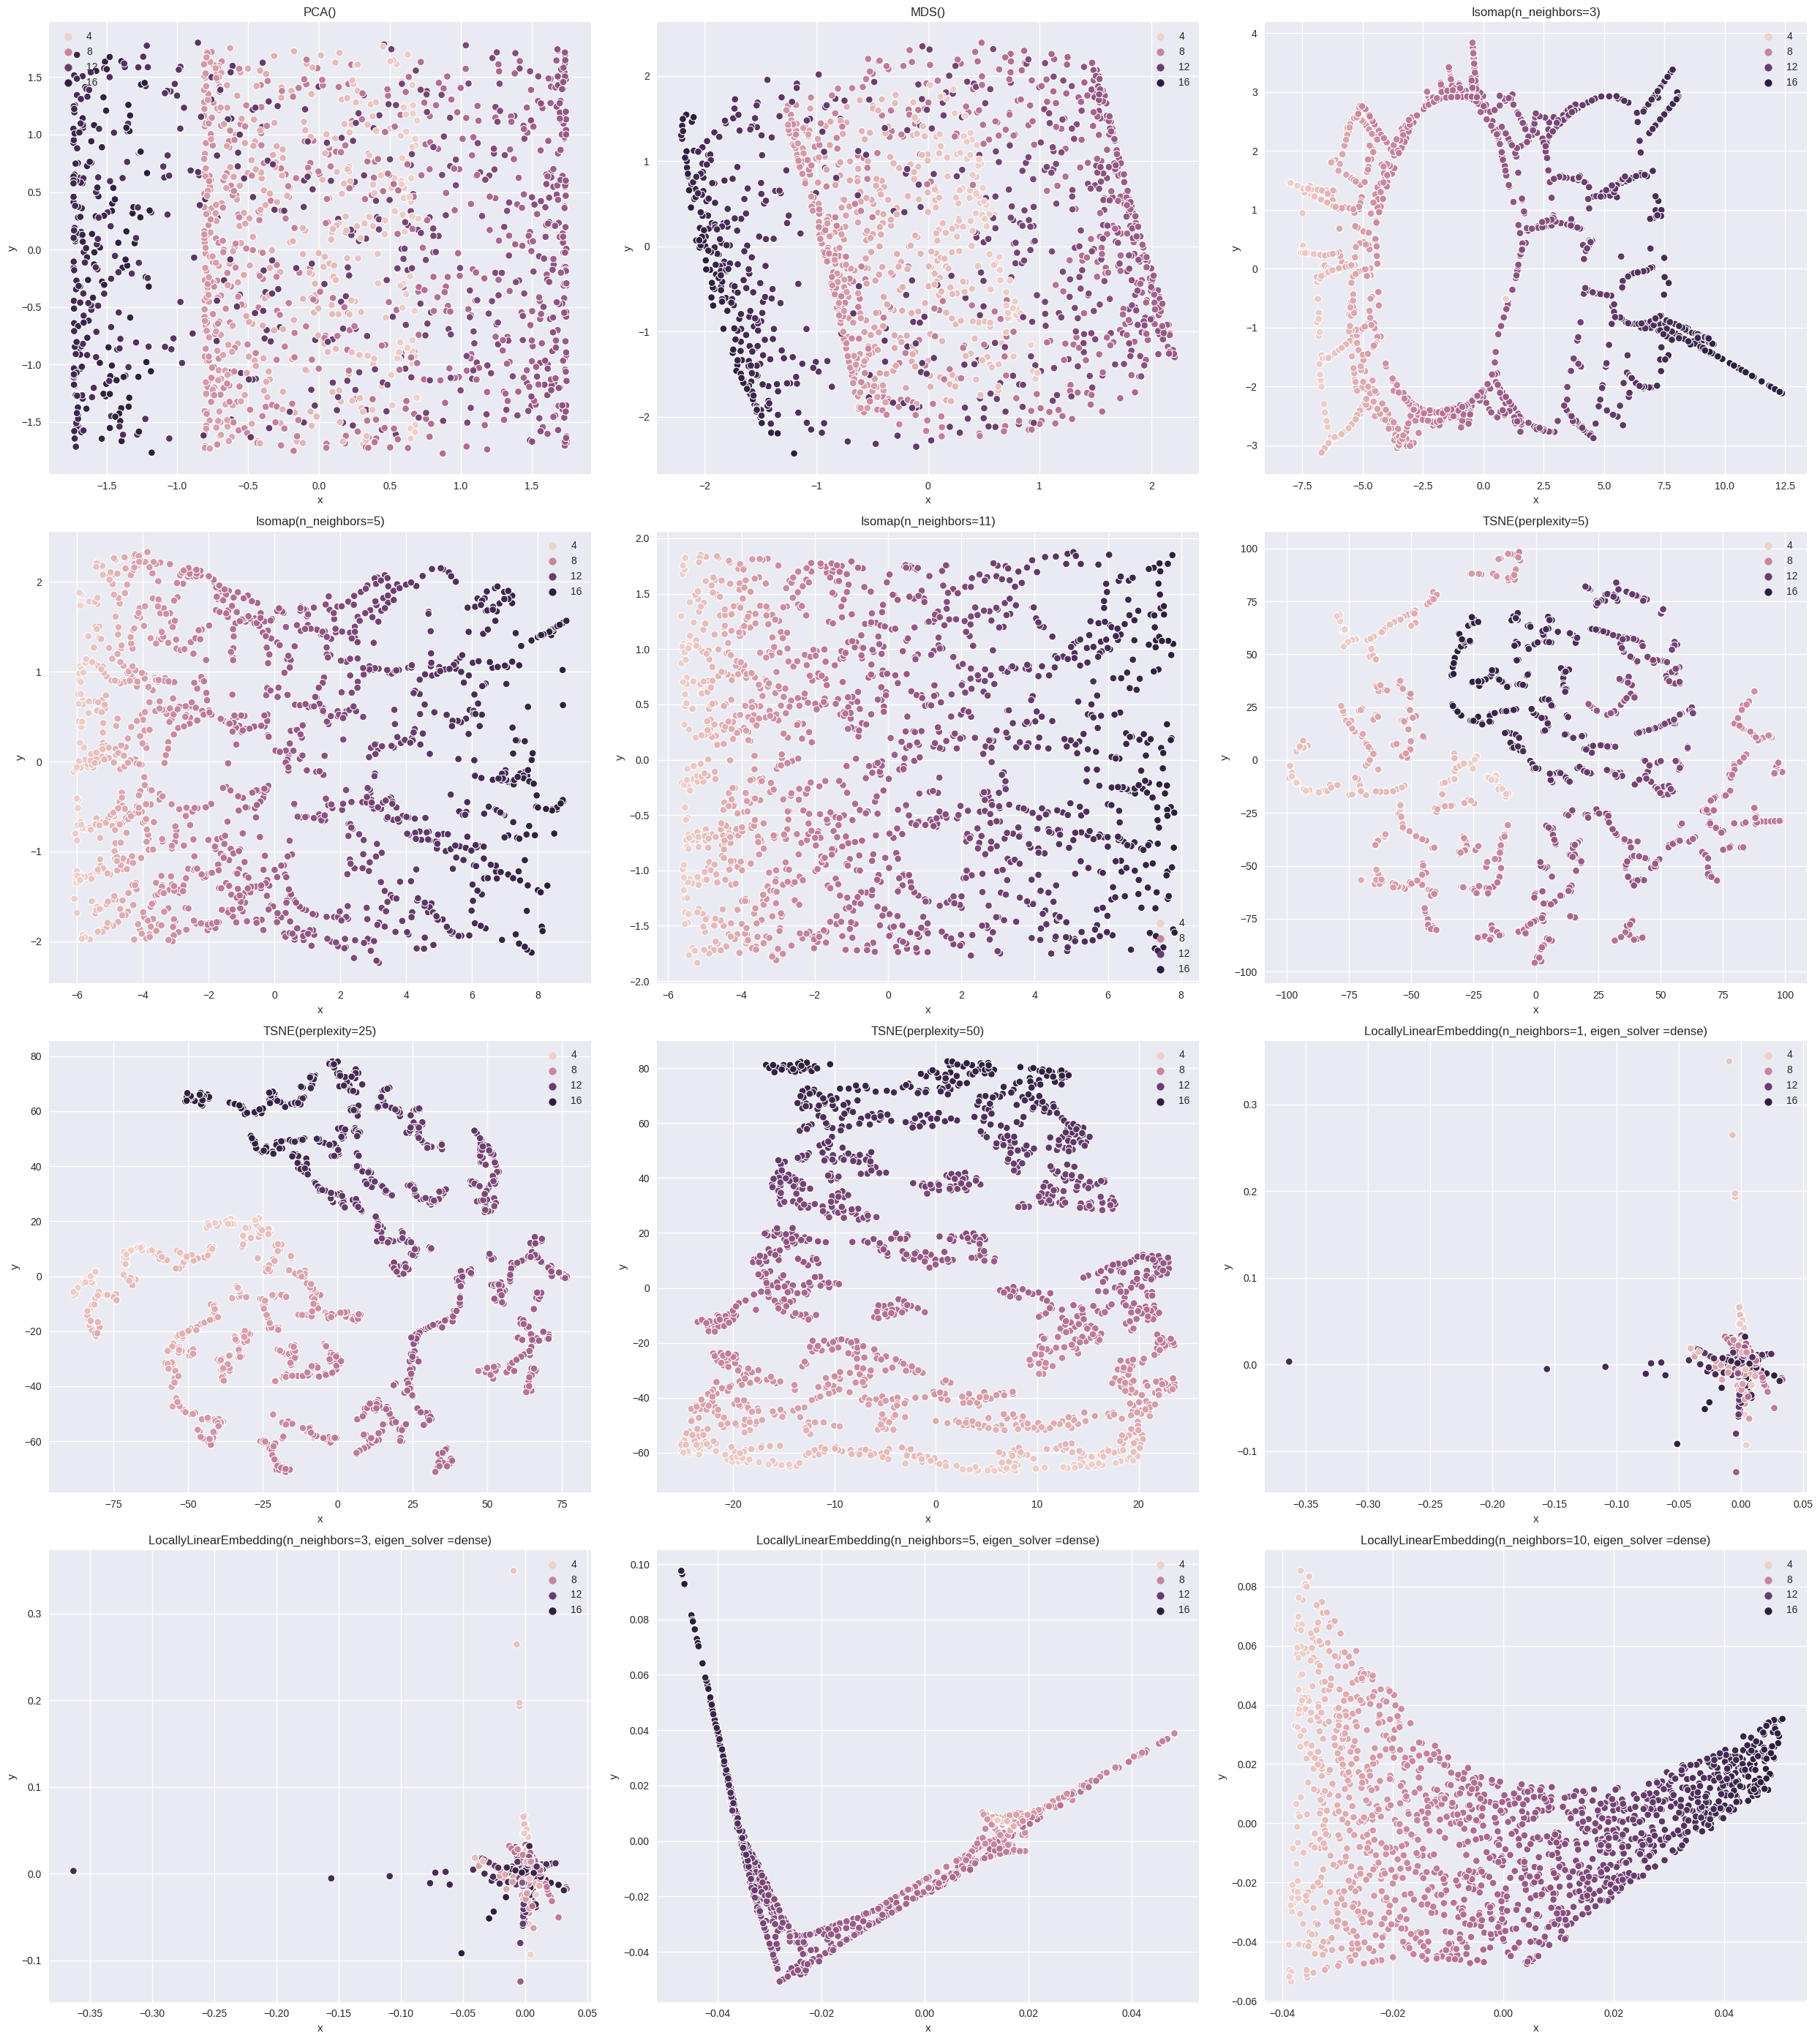

In [10]:
transformers = {"PCA()":PCA(n_components=2),
                "MDS()":MDS(),
                "Isomap(n_neighbors=3)":Isomap(n_neighbors=3),
                "Isomap(n_neighbors=5)":Isomap(n_neighbors=5),
                "Isomap(n_neighbors=11)":Isomap(n_neighbors=11),
                "TSNE(perplexity=5)":TSNE(perplexity=5),
                "TSNE(perplexity=25)":TSNE(perplexity=10),
                "TSNE(perplexity=50)":TSNE(perplexity=25),
                "LocallyLinearEmbedding(n_neighbors=1, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=3, eigen_solver ="dense"),
                "LocallyLinearEmbedding(n_neighbors=3, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=3, eigen_solver ="dense"),
                "LocallyLinearEmbedding(n_neighbors=5, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=5, eigen_solver ="dense"),
                "LocallyLinearEmbedding(n_neighbors=10, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=10, eigen_solver ="dense")
               }
swiss_roll_df[["x","y","z"]] = StandardScaler().fit_transform(swiss_roll_df[["x","y","z"]])
transformed=generate_transformers(transformers,swiss_roll_df)
plot_data_swiss_roll(transformed)

## Wnioski dla zbioru swiss roll

**PCA** oraz **MDS** przedstawiają bardzo podobne wyniki podziału, oba algorytmy nie poradziły sobie z podziałem zbioru, wiele różnych kolorów nachodzi się na siebie. 

**ISOMAP** przy większej liczbie sąsiadów prezentuje najlepsze wyniki spośród badanych algorytmów. Przy mniejszej wartości tego paramteru widać gorsze wykorzystanie przestrzeni. 

**TSN** prezentuje się lepiej od **PCA** oraz **MDS** jednak ma większe problemy w zagospodarowaniu przestrzenia od **ISOMAP**, szczególnie dla mniejszych wartości **perplexity**. Dodatkowo dla mniejszych wartości **perplexity** punkty  sa pogrupowane kolorem jednak widoczne jest że punkty ciemne sąsiaduja z jasnymi. 

**LocallyLinearEmbedding** dla małych wartości **n_neighbors** działa bardzo słabo, dla  większych  widać znacząca poprawę, jednak zagospodarowanie przestrzeni nadal nie jest najlepsze.

# MNIST

In [11]:
def plot_data_mnist(transformed):
#     print("HERE")
    num_of_plots = len(transformed)
    num_of_rows = math.ceil(num_of_plots/3)
    fig, axs = plt.subplots(num_of_rows, 3, figsize=(25, num_of_rows*7), dpi=100)
    for ax, (k,df) in zip(axs.ravel(), transformed.items()):
#         print(df.index)
        sns.scatterplot(data=df, x='x', y='y', hue=df.index, ax=ax)
        ax.set(title=str(k))
    fig.tight_layout()
    plt.show()

In [12]:
mnist_df, labels = load_digits(as_frame=True, return_X_y= True)
labels = labels.astype(str)
mnist_df.set_index(labels, inplace=True)
mnist_df

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
target                                                                     
0             0.0        0.0        5.0       13.0        9.0        1.0   
1             0.0        0.0        0.0       12.0       13.0        5.0   
2             0.0        0.0        0.0        4.0       15.0       12.0   
3             0.0        0.0        7.0       15.0       13.0        1.0   
4             0.0        0.0        0.0        1.0       11.0        0.0   
...           ...        ...        ...        ...        ...        ...   
9             0.0        0.0        4.0       10.0       13.0        6.0   
0             0.0        0.0        6.0       16.0       13.0       11.0   
8             0.0        0.0        1.0       11.0       15.0        1.0   
9             0.0        0.0        2.0       10.0        7.0        0.0   
8             0.0        0.0       10.0       14.0        8.0        1.0   

        pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
target                                              ...                         
0             0.0        0.0        0.0        0.0  ...        0.0        0.0   
1             0.0        0.0        0.0        0.0  ...        0.0        0.0   
2             0.0        0.0        0.0        0.0  ...        5.0        0.0   
3             0.0        0.0        0.0        8.0  ...        9.0        0.0   
4             0.0        0.0        0.0        0.0  ...        0.0        0.0   
...           ...        ...        ...        ...  ...        ...        ...   
9             0.0        0.0        0.0        1.0  ...        4.0        0.0   
0             1.0        0.0        0.0        0.0  ...        1.0        0.0   
8             0.0        0.0        0.0        0.0  ...        0.0        0.0   
9             0.0        0.0        0.0        0.0  ...        2.0        0.0   
8             0.0        0.0        0.0        2.0  ...        8.0        0.0   

        pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
target                                                                     
0             0.0        0.0        6.0       13.0       10.0        0.0   
1             0.0        0.0        0.0       11.0       16.0       10.0   
2             0.0        0.0        0.0        3.0       11.0       16.0   
3             0.0        0.0        7.0       13.0       13.0        9.0   
4             0.0        0.0        0.0        2.0       16.0        4.0   
...           ...        ...        ...        ...        ...        ...   
9             0.0        0.0        2.0       14.0       15.0        9.0   
0             0.0        0.0        6.0       16.0       14.0        6.0   
8             0.0        0.0        2.0        9.0       13.0        6.0   
9             0.0        0.0        5.0       12.0       16.0       12.0   
8             0.0        1.0        8.0       12.0       14.0       12.0   

        pixel_7_6  pixel_7_7  
target                        
0             0.0        0.0  
1             0.0        0.0  
2             9.0        0.0  
3             0.0        0.0  
4             0.0        0.0  
...           ...        ...  
9             0.0        0.0  
0             0.0        0.0  
8             0.0        0.0  
9             0.0        0.0  
8             1.0        0.0  

[1797 rows x 64 columns]

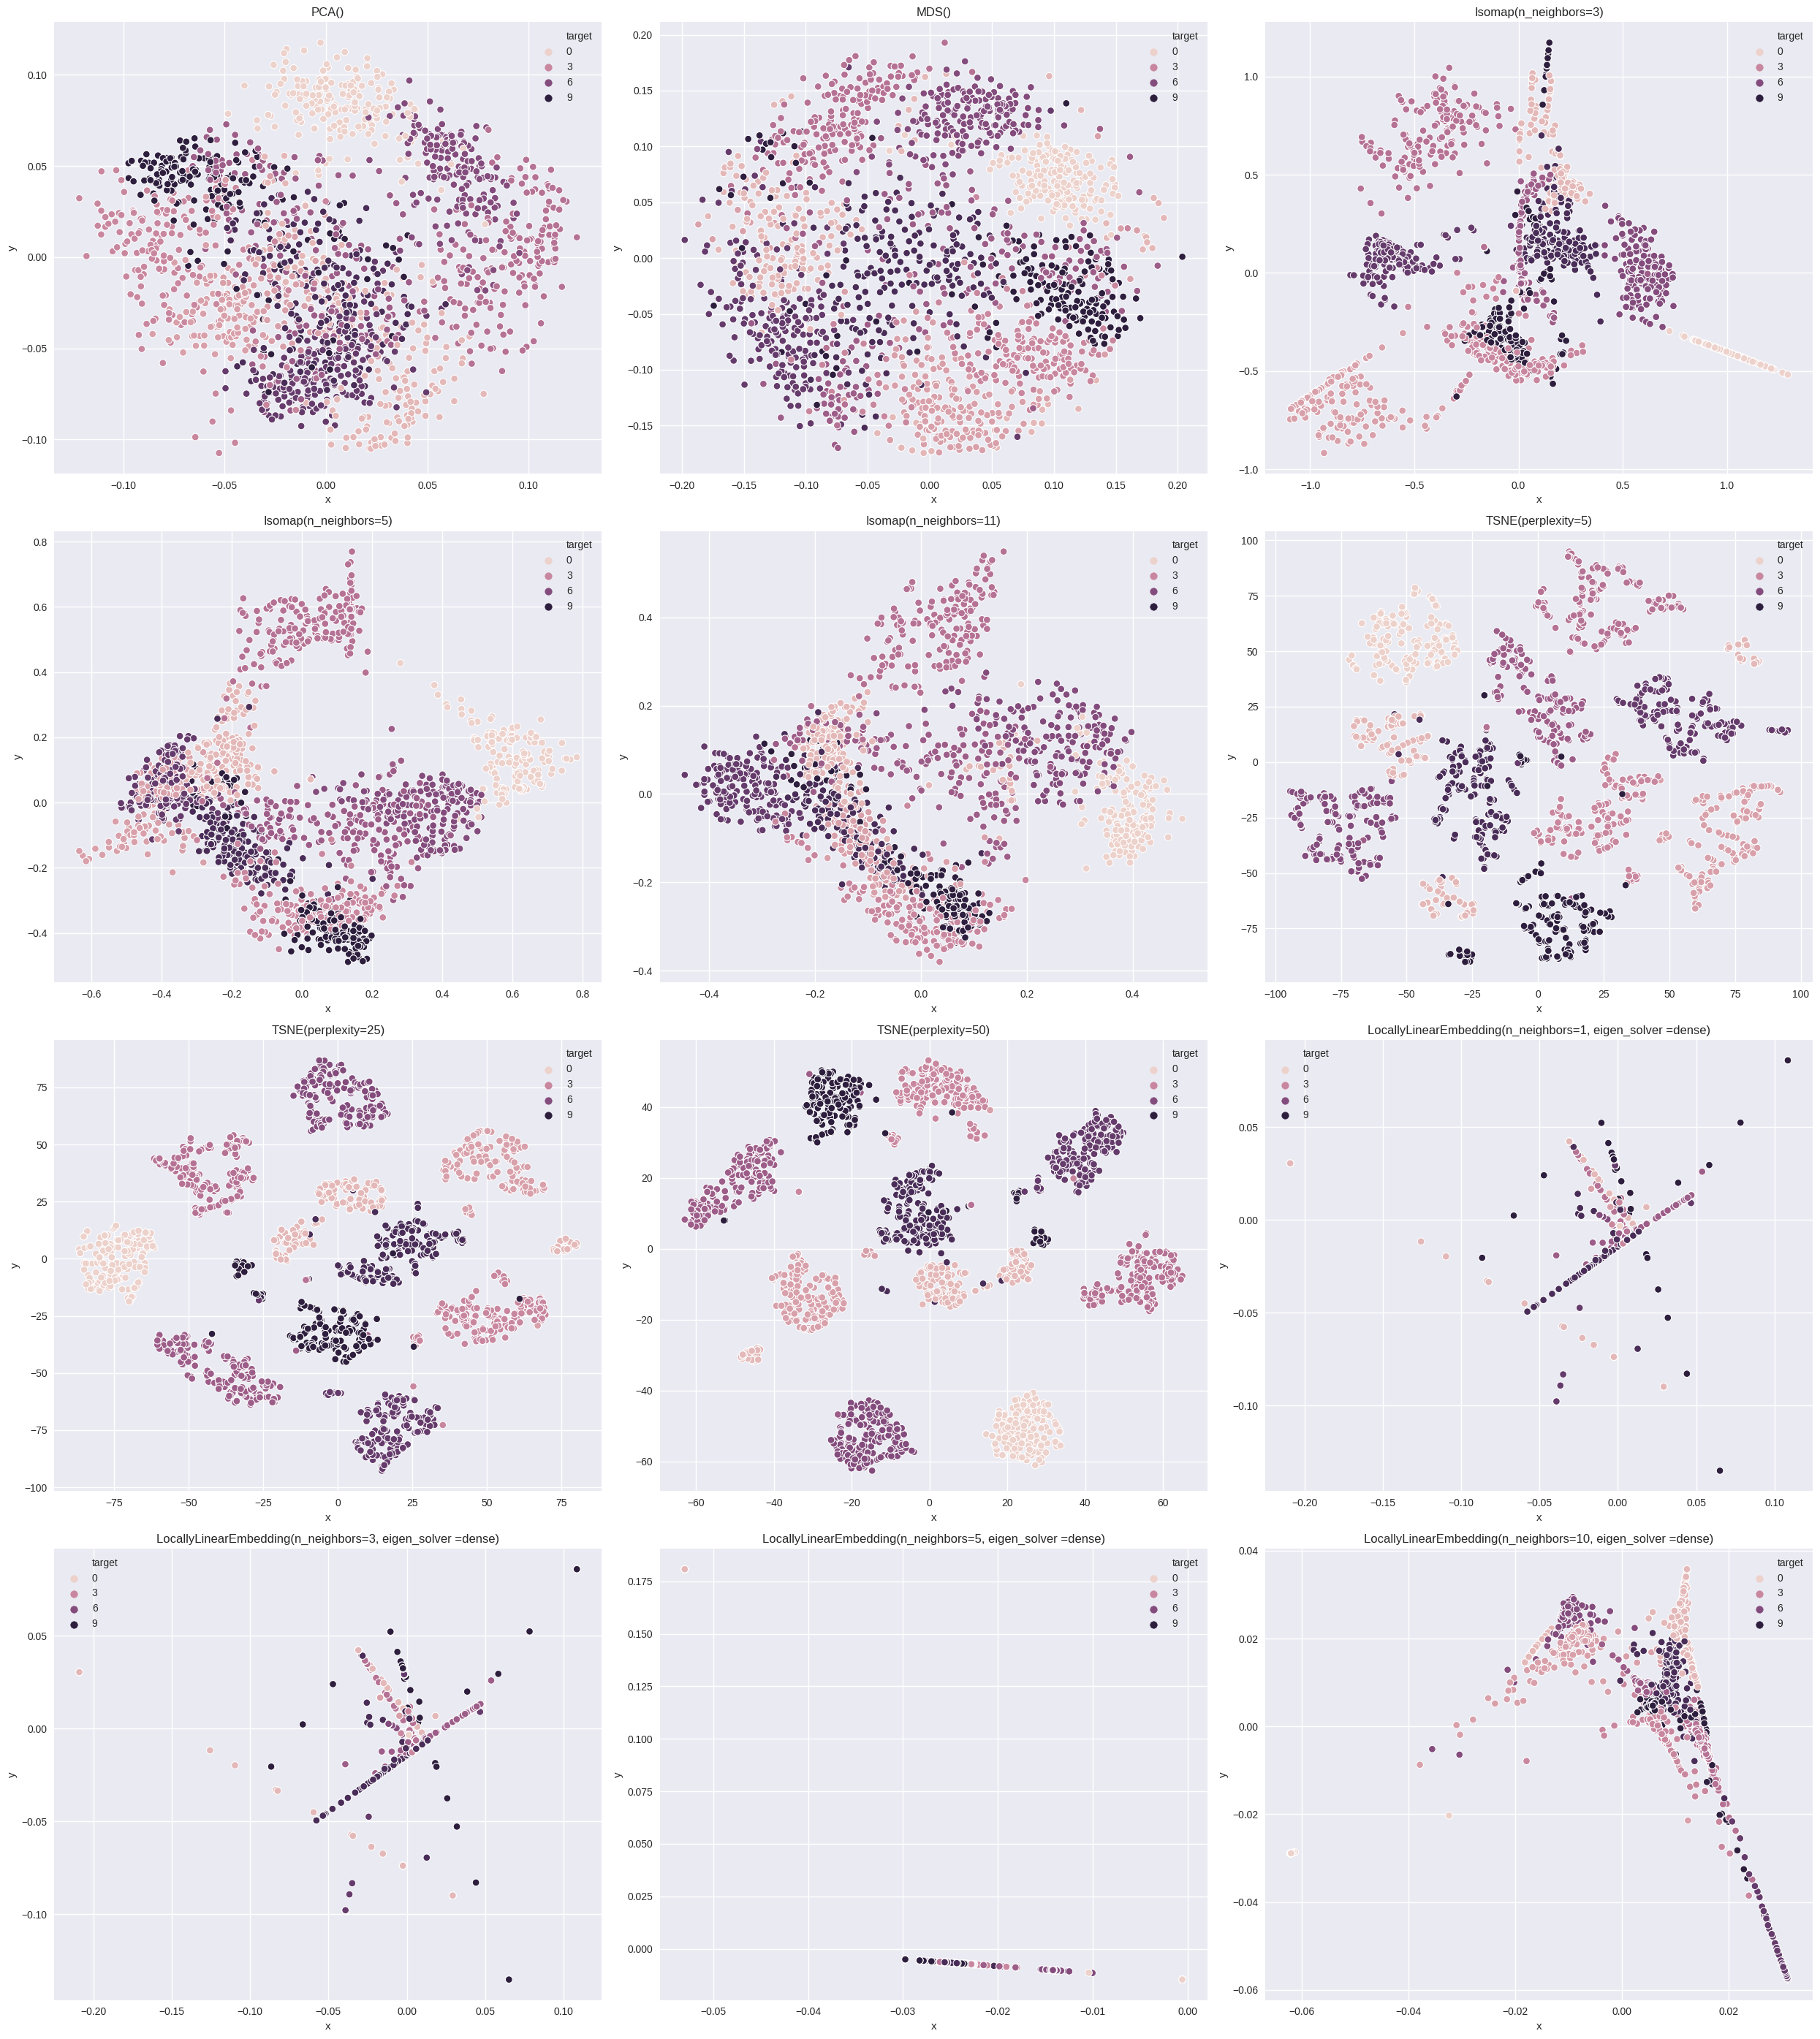

In [14]:
transformers = {"PCA()":PCA(n_components=2),
                "MDS()":MDS(),
                "Isomap(n_neighbors=3)":Isomap(n_neighbors=3),
                "Isomap(n_neighbors=5)":Isomap(n_neighbors=5),
                "Isomap(n_neighbors=11)":Isomap(n_neighbors=11),
                "TSNE(perplexity=5)":TSNE(perplexity=5),
                "TSNE(perplexity=25)":TSNE(perplexity=10),
                "TSNE(perplexity=50)":TSNE(perplexity=25),
                "LocallyLinearEmbedding(n_neighbors=1, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=3, eigen_solver ="dense"),
                "LocallyLinearEmbedding(n_neighbors=3, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=3, eigen_solver ="dense"),
                "LocallyLinearEmbedding(n_neighbors=5, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=5, eigen_solver ="dense"),
                "LocallyLinearEmbedding(n_neighbors=10, eigen_solver =dense)":LocallyLinearEmbedding(n_neighbors=10, eigen_solver ="dense")
               }

# mnist_df.loc[ : , mnist_df.columns != 'labels'] = StandardScaler().fit_transform( mnist_df.loc[ : , mnist_df.columns != 'labels'])

mnist_df = mnist_df/16.0
transformed=generate_transformers(transformers,mnist_df)
plot_data_mnist(transformed)

## Wnioski dla zbioru mnist

**LocallyLinearEmbedding** nie radzi sobie ze zbiorem **mnist**

W **PCA** oraz w **MDS** widać grupowania według kolorów, oraz przestrzeń jest całkiem dobrze zagospodarowana, jednak wystepuje dużo nachodzących na siebie punktów

**Isomap** w również widać pewne podziały, podzbiory jednak mocno na siebie nachodzą oraz są rozrzucone po przestrzeni. 

Najlepsze wyniki prezentuje **TSNE** który porozdzielał wszystkie podzbiory, i posiada najmniej nachodzących na siebie punktów. Przy większej wartości **perplexity** widać bardziej zbite podzbiory.
Występują pewne wymieszania i podziały wśród podzbiorów, które wynikają najprawdopodobniej z dużego podobieństwa takich cyfr jak **1** oraz **7**.